# Groundhog Day, an introduction

For the following assignment, the dataset of Groundhog Day is used from TidyTuesday. Different data manipulations, and methods will be used to make useful variables, interesting showcases and informative graphs:

- Create a dictionary, which includes id as primary key, and dictionary with other variables (such as name, pred. count etc) as its value.
- Make a function, which let you choose those groundhogs, which are real/fake
- Create 3 graphs:
    - Number of real groundhogs based on countries
    - Number of real groundhogs based on regions
    - Timeline of groundhogs

While some of these can be done more easily, for example using simple pandas commands, I want to show my skills and that we can get the same results in different ways.

# Import

In [3]:
import pandas as pd
import numpy as np
from plotnine import *

# Data

In [4]:
# importing the dataset

groundhogs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/groundhogs.csv')
predictions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/predictions.csv')

In [5]:
# creating a merged data

merged_gh = groundhogs.merge(predictions, on = "id")

# Codes

## Useful Dictionary

In [6]:
# Base: {id:{name:name,
#            sname:sname,
#            country:country,
#            predictions:predictions}}

# While .to_dict() already converts the whole data to dictionary, not all of them is needed,
# that's the reason why only a few of the variables have been chosen

Groundhog_Dict = {d["id"]:{"name":d["name"],
                            "sname":d["shortname"],
                            "country":d["country"],
                            "predictions":d["predictions_count"]} for d in groundhogs.to_dict(orient = "records")}

# Groundhog Type Function

In [7]:
def GH_Type(real = True): # Let the base be real groundhogs
        # use .loc[] to return real(True) or fake(False) rows
        return groundhogs.loc[groundhogs["is_groundhog"] == real]


In [11]:
# Let's check:
print(GH_Type()["is_groundhog"].value_counts())
print(GH_Type(real = False)["is_groundhog"].value_counts())

is_groundhog
True    32
Name: count, dtype: int64
is_groundhog
False    43
Name: count, dtype: int64


# Graphs

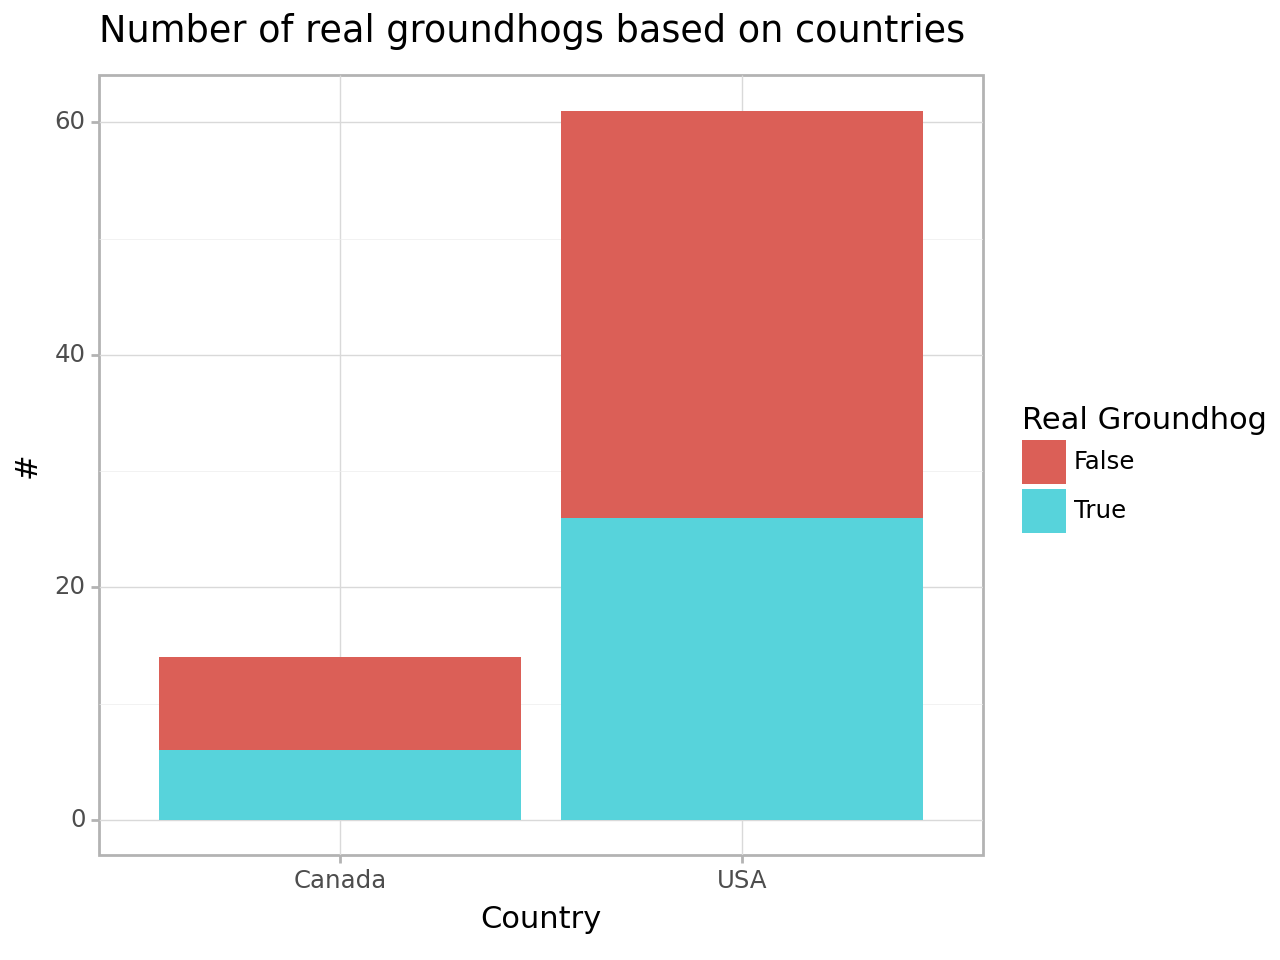

<Figure Size: (640 x 480)>

In [16]:
(
ggplot(groundhogs, aes(x = "country", fill = "is_groundhog")) +
  geom_bar(position = "stack") + 
  labs(x = "Country", y = "#", fill = "Real Groundhog", title = "Number of real groundhogs based on countries") +
  theme_light()
)

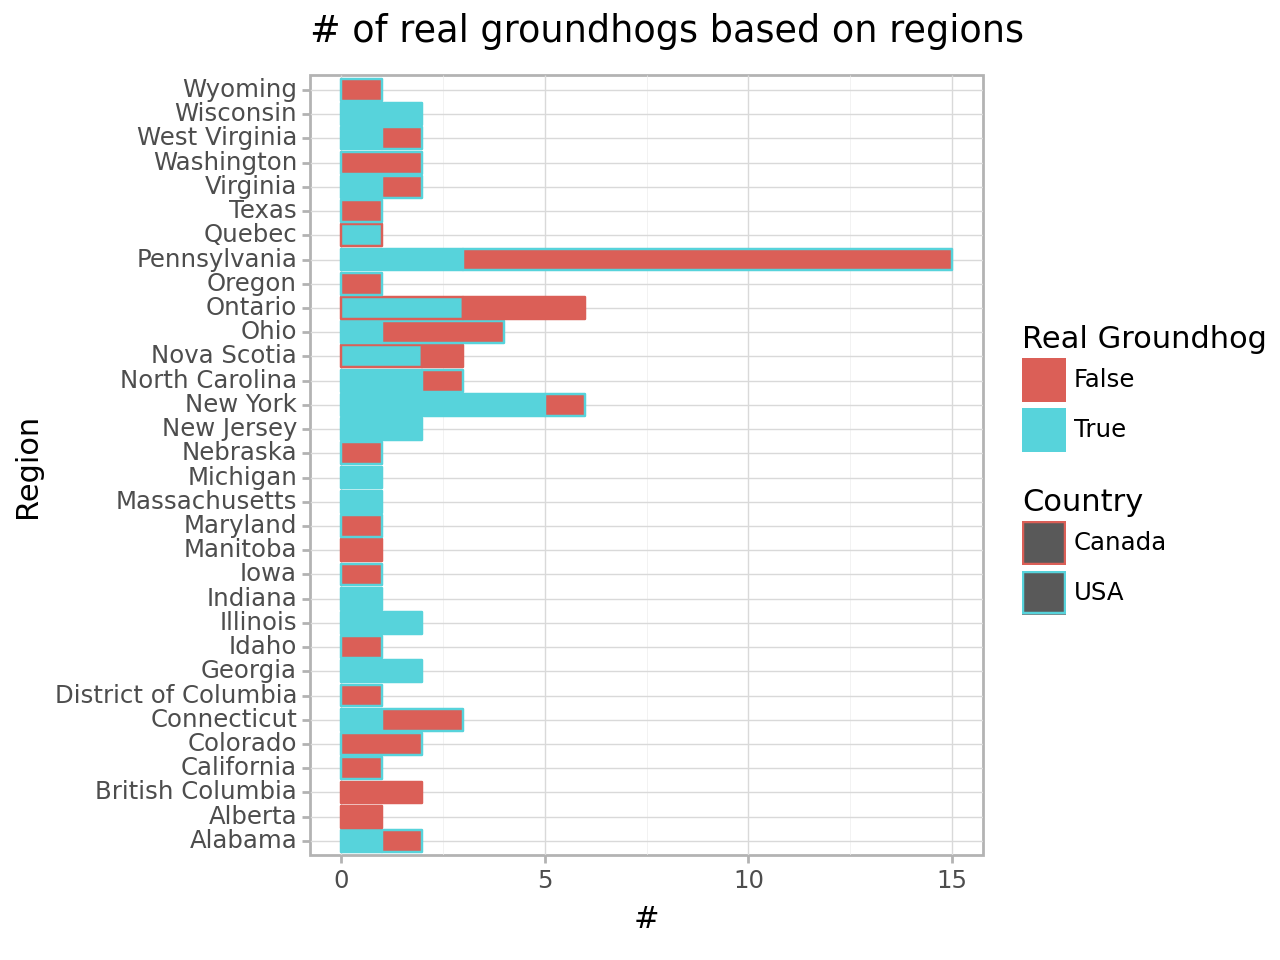

<Figure Size: (640 x 480)>

In [10]:
(
ggplot(groundhogs, aes("region", fill = "is_groundhog", color = "country")) +
  geom_bar(position = "stack") + 
  labs(x = "Region", y = "#",
       fill = "Real Groundhog",
       color = "Country",
       title = "# of real groundhogs based on regions") +
  theme_light() +
  coord_flip()
)

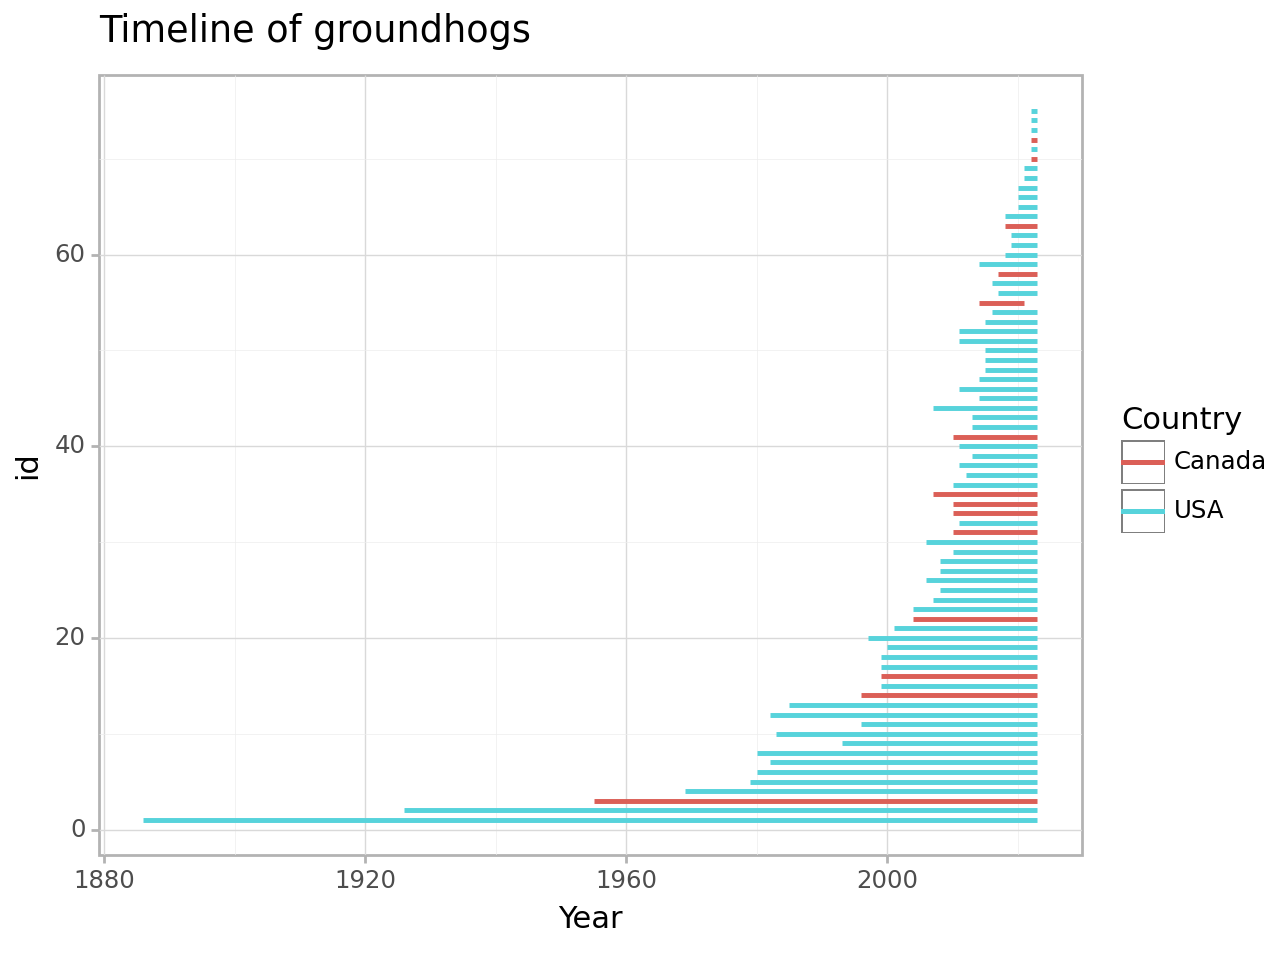

<Figure Size: (640 x 480)>

In [17]:
(
ggplot(merged_gh, aes("year","id", fill = "name", color = "country")) +
  geom_line(size = 1) +
  labs(x = "Year",
       color = "Country",
       title = "Timeline of groundhogs") +
  theme_light() +
  guides(fill = False)
)